In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sn_df = pd.read_csv('Social_Network_Ads - Social_Network_Ads.csv')

In [3]:
sn_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
sn_df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
sn_df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
sn_df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

sn_df['Gender'] = le.fit_transform(sn_df['Gender'])
sn_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [8]:
sn_df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
sn_df.drop('User ID', axis=1, inplace=True)
sn_df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


<Axes: >

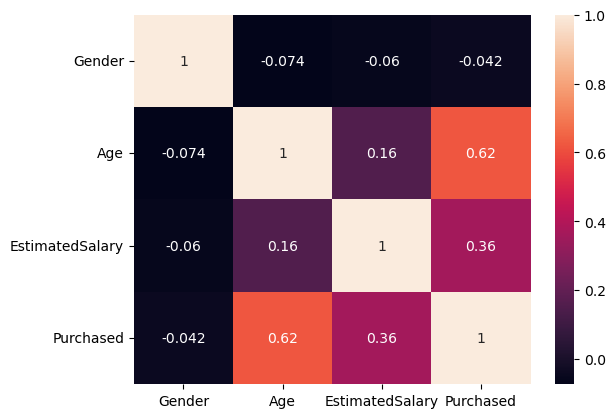

In [10]:
sns.heatmap(sn_df.corr(), annot =True)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = sn_df.drop("Purchased", axis=1)
y = sn_df["Purchased"]

In [12]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [15]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]], shape=(400, 3))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
model.score(X_test, y_test)

0.925

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [28]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test, y_pred)
er = 1 - acc
recall = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)

In [29]:
print("Confusion_matrix:\n", cm)

Confusion_matrix:
 [[49  1]
 [ 5 25]]


In [30]:
print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Accuracy: {acc:.2f}")
print(f"Error Rate: {er:.2f}")
print(f"Precision: {pre:.2f}")
print(f"Recall: {recall:.2f}")

TP: 25, FP: 1, TN: 49, FN: 5
Accuracy: 0.93
Error Rate: 0.07
Precision: 0.96
Recall: 0.83


Text(50.722222222222214, 0.5, 'Actual')

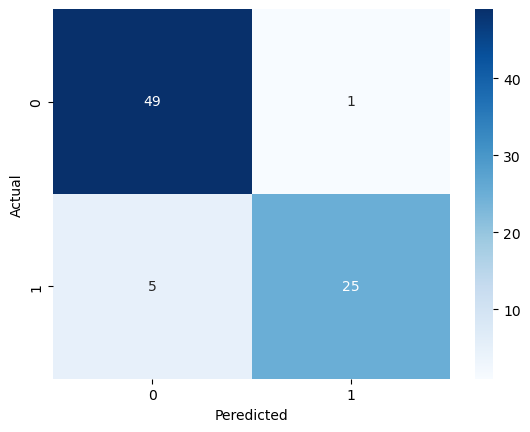

In [33]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Peredicted')
plt.ylabel('Actual')